In [80]:
#https://www.kaggle.com/jessemostipak/hotel-booking-demand
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns 

#cross validation
from sklearn.model_selection import train_test_split

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder

In [62]:
bookings = pd.read_csv('hotel_bookings.csv', header =0)

In [63]:
analysis = pd.read_csv('hotel_bookings.csv', header =0)
analysis = pd.DataFrame(analysis).fillna(0)

In [64]:
not_canceled = analysis[analysis['is_canceled'] !=  1]
canceled = analysis[analysis['is_canceled'] == 1]

Text(0.5, 0.98, 'Cancelations by Deposit Type')

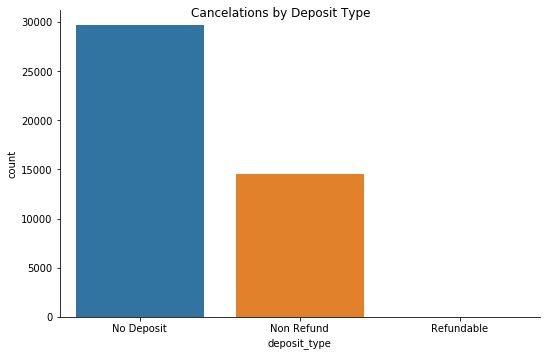

In [38]:
fg = sns.catplot('deposit_type', data=canceled, kind='count', aspect=1.5)
fg.set_xlabels('deposit_type')
fg.fig.suptitle('Cancelations by Deposit Type')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0.98, 'Bookings by Agent')

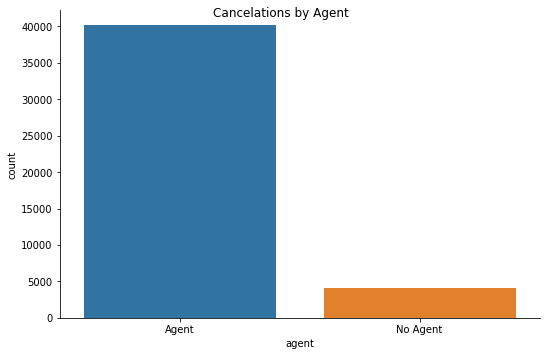

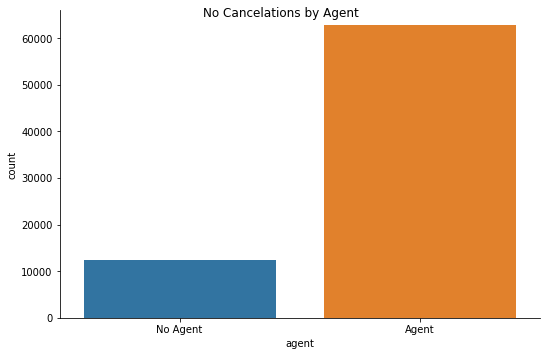

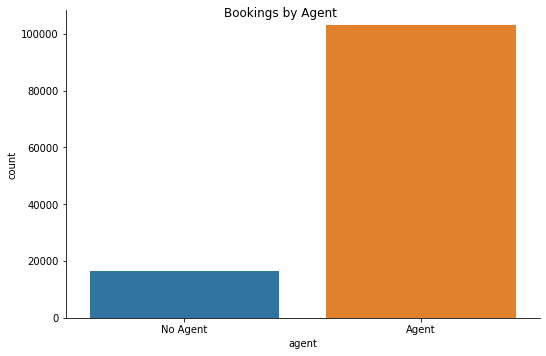

In [17]:
def split_agent(agent):      
    if agent == 0:
        return 'No Agent'
    else:
        return 'Agent'

canceled_agent = canceled
canceled_agent['agent'] = canceled_agent['agent'].apply(split_agent) 
fg = sns.catplot('agent', data=canceled_agent, kind='count', aspect=1.5)
fg.set_xlabels('agent')
fg.fig.suptitle('Cancelations by Agent')

not_canceled_agent = not_canceled
not_canceled_agent['agent'] = not_canceled_agent['agent'].apply(split_agent) 
fg = sns.catplot('agent', data=not_canceled_agent, kind='count', aspect=1.5)
fg.set_xlabels('agent')
fg.fig.suptitle('No Cancelations by Agent')

all_agent = analysis
all_agent['agent'] = all_agent['agent'].apply(split_agent) 
fg = sns.catplot('agent', data=all_agent, kind='count', aspect=1.5)
fg.set_xlabels('agent')
fg.fig.suptitle('Bookings by Agent')

In [55]:
#Top Agents with more cancelations
agents = canceled
agents['agent'] = agents['agent'].astype('category')
gb = agents.groupby('agent')['agent'].count()
gb=gb.drop([0.0]) #Remove the bookings without an agent
gb.nlargest(5)



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


agent
9.0      13264
240.0     5484
1.0       5280
6.0       1025
19.0       780
Name: agent, dtype: int64

In [40]:
agents["agent"]

0         No Agent
1         No Agent
2         No Agent
3            Agent
4            Agent
            ...   
119385       Agent
119386       Agent
119387       Agent
119388       Agent
119389       Agent
Name: agent, Length: 119390, dtype: object

In [10]:
#Top agents with more completed bookings
agents = not_canceled
agents['agent'] = agents['agent'].astype('category')
gb = agents.groupby('agent')['agent'].count()
gb.nlargest(10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


agent
Agent       62856
No Agent    12310
Name: agent, dtype: int64

In [11]:
#Top highest percentage of agents with canceled bookings 
agents= analysis[["agent","is_canceled"]]
grouped = agents.groupby(['agent','is_canceled']).agg({'agent': 'count'})
percent = grouped.groupby(level=0).apply(lambda x:
                                100 * x / float(x.sum()))
print(percent)
#percent.to_csv('agent_percentage.csv')
#percent = pd.DataFrame(data=percent)
#percent.filter(lambda x: x['is_canceled'] == 1)
#top_cancelpercent = percent[(percent['is_canceled'] == 1)]

                          agent
agent    is_canceled           
Agent    0            60.995633
         1            39.004367
No Agent 0            75.336597
         1            24.663403


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


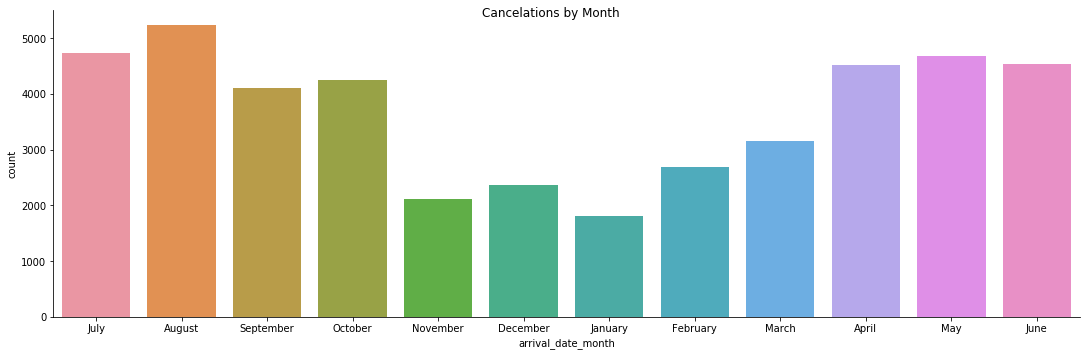

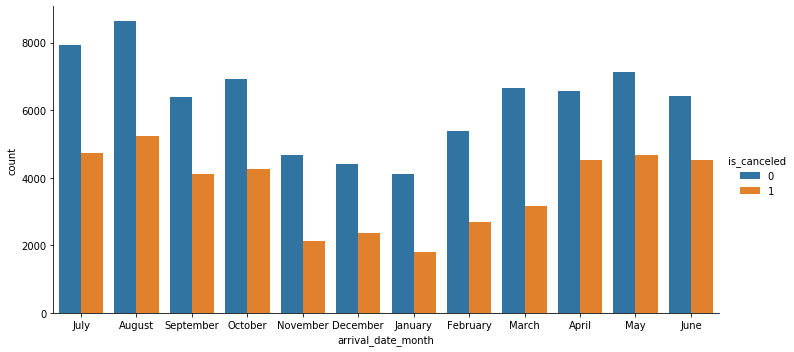

In [425]:
fg = sns.catplot('arrival_date_month', data=canceled, kind='count', aspect=3)
fg.set_xlabels('arrival_date_month')
fg.fig.suptitle('Cancelations by Month')

sns.factorplot('arrival_date_month', data=analysis, kind='count', hue='is_canceled', aspect=2)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64


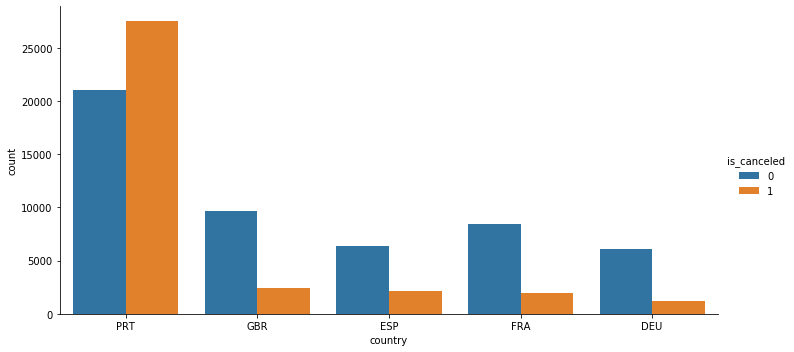

In [60]:
#Top 5 countries with more reservations and the distribution by cancelation
top_country = analysis.groupby('country')['country'].count()
top_country = top_country.nlargest(5)
print(top_country)

top_country_graph = analysis[analysis['country'].isin(['PRT', 'GBR', 'FRA','ESP', 'DEU'])]
sns.factorplot('country', data=top_country_graph, kind='count', hue='is_canceled', aspect=2)

In [291]:
bookings.head()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,0,Resort Hotel,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [292]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [293]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
is_canceled                       119390 non-null int64
hotel                             119390 non-null object
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [65]:
#Encode categories with string values

lb_make = LabelEncoder()
bookings["hotel_code"] = lb_make.fit_transform(bookings["hotel"])
bookings["arrival_date_month_code"] = lb_make.fit_transform(bookings["arrival_date_month"])
bookings["meal_code"] = lb_make.fit_transform(bookings["meal"])
bookings["country"] = bookings["country"].astype(str)
bookings["country_code"] = lb_make.fit_transform(bookings["country"])
bookings["market_segment_code"] = lb_make.fit_transform(bookings["market_segment"])
bookings["distribution_channel_code"] = lb_make.fit_transform(bookings["distribution_channel"])
bookings["reserved_room_type_code"] = lb_make.fit_transform(bookings["reserved_room_type"])
bookings["assigned_room_type_code"] = lb_make.fit_transform(bookings["assigned_room_type"])
bookings["deposit_type_code"] = lb_make.fit_transform(bookings["deposit_type"])
bookings["customer_type_code"] = lb_make.fit_transform(bookings["customer_type"])
bookings["reservation_status_code"] = lb_make.fit_transform(bookings["reservation_status"])


#bookings[["hotel", "hotel_code"]].head(11)

#Remove the categories without code
del bookings["hotel"]
del bookings["arrival_date_month"]
del bookings["meal"]
del bookings["country"]
del bookings["market_segment"]
del bookings["distribution_channel"]
del bookings["reserved_room_type"]
del bookings["assigned_room_type"]
del bookings["deposit_type"]
del bookings["customer_type"]
del bookings["reservation_status"]

In [66]:
#Remove null values

#np.isnan(bookings)
#np.where(np.isnan(bookings))
bookings = pd.DataFrame(bookings).fillna(0)

In [296]:
#Correlation matrix to determine features to remove
corrMat = bookings.corr().abs()
corrMat = corrMat.unstack()
corrMatSort = corrMat.sort_values(ascending = False, kind="quicksort")
print(corrMatSort)
corrMatSort.to_csv('correlacion.csv') #to read all correlations in a file instead to print


reservation_status_code    reservation_status_code      1.000000
agent                      agent                        1.000000
assigned_room_type_code    assigned_room_type_code      1.000000
reserved_room_type_code    reserved_room_type_code      1.000000
distribution_channel_code  distribution_channel_code    1.000000
                                                          ...   
arrival_date_year          arrival_date_day_of_month    0.000221
arrival_date_day_of_month  agent                        0.000202
agent                      arrival_date_day_of_month    0.000202
booking_changes            lead_time                    0.000149
lead_time                  booking_changes              0.000149
Length: 961, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [67]:
#remove uneeded column due to high correlation
del bookings['arrival_date_year']
del bookings['reservation_status_date']
del bookings["reservation_status_code"]

In [298]:
#bookings['agent'] = bookings['agent'].astype('category')
#bookings['country'] = bookings['country'].astype('category')
#bookings['agent'] = bookings['agent'].cat.add_categories('Unknown')
#bookings['agent'].fillna('Unknown', inplace =True) 



In [68]:
#features
features = bookings.iloc[:,1:27]
print('Summary of feature sample')
features.head()

Summary of feature sample


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,hotel_code,arrival_date_month_code,meal_code,country_code,market_segment_code,distribution_channel_code,reserved_room_type_code,assigned_room_type_code
0,342,27,1,0,0,2,0.0,0,0,0,...,0,0,1,5,0,135,3,1,2,2
1,737,27,1,0,0,2,0.0,0,0,0,...,0,0,1,5,0,135,3,1,2,2
2,7,27,1,0,1,1,0.0,0,0,0,...,0,0,1,5,0,59,3,1,0,2
3,13,27,1,0,1,1,0.0,0,0,0,...,0,0,1,5,0,59,2,0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,...,0,1,1,5,0,59,6,3,0,0


In [69]:
#dependent variable
depVar = bookings['is_canceled']
#Training Set (Feature Space: X Training)
X_train = (features[: 100000])
X_train.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,hotel_code,arrival_date_month_code,meal_code,country_code,market_segment_code,distribution_channel_code,reserved_room_type_code,assigned_room_type_code
0,342,27,1,0,0,2,0.0,0,0,0,...,0,0,1,5,0,135,3,1,2,2
1,737,27,1,0,0,2,0.0,0,0,0,...,0,0,1,5,0,135,3,1,2,2
2,7,27,1,0,1,1,0.0,0,0,0,...,0,0,1,5,0,59,3,1,0,2
3,13,27,1,0,1,1,0.0,0,0,0,...,0,0,1,5,0,59,2,0,0,0
4,14,27,1,0,2,2,0.0,0,0,0,...,0,1,1,5,0,59,6,3,0,0


In [70]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 100000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 100000


0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

In [71]:
#Testing Set (X Testing)
X_test = features[-1000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 1000
        lead_time  arrival_date_week_number  arrival_date_day_of_month  \
118390         40                        33                         18   
118391        201                        33                         16   
118392         93                        33                         17   
118393        185                        33                         16   
118394         23                        33                         18   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
118390                        0                     1       2       0.0   
118391                        0                     3       2       0.0   
118392                        0                     2       3       0.0   
118393                        0                     3       2       1.0   
118394                        0                     1       3       1.0   

        babies  is_repeated_guest  previo

In [72]:
#Ground Truth (y_test) 
y_test = depVar[-1000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1000


118390    0
118391    0
118392    0
118393    0
118394    0
Name: is_canceled, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((75000, 26), (25000, 26))

In [74]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [306]:
modelRF.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [310]:
modelSVR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [307]:
print(cross_val_score(modelRF, X_train, y_train)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.66835944 0.66059691 0.66850152]


In [312]:
print(cross_val_score(modelSVR, X_train, y_train)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.41516875 0.41854817 0.41776409]


In [81]:
print(cross_val_score(modelLR, X_train, y_train)) 

[0.32437474 0.32792316 0.33109662]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [308]:
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.66788938 0.66664642 0.67297914]


0.9377308921268283

In [314]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train))
modelSVR.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.41516875 0.41854817 0.41776409]


0.9418449116912629

In [83]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train))
modelLR.score(X_train,y_train)

[0.32437474 0.32792316 0.33109662]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.329239130074936

In [315]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.688
RMSE: 0.278


In [316]:
#Make Predictions
predictions = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.452
RMSE: 0.368
